In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys
# adding project directory to path, this is a bit hacky and may not work for all
sys.path.insert(0, os.path.abspath(os.path.dirname(os.path.abspath(''))))

from kbgen.config import rootdir

plt.style.use("./mine.mplstyle")
datadir = os.path.join(rootdir, "data/gsm")
try:
    df = pd.read_csv(os.path.join(datadir, "gsm.csv"), low_memory=False)
except FileNotFoundError:
    print("Data not found in", datadir)
    print("Please download the dataset and place it in the data folder.")
    print("Run `kaggle datasets download -d msainani/gsmarena-mobile-devices`")
    print("Then unzip the file and place it in the data folder. Using")
    print("`unzip gsmarena-mobile-devices.zip gsm.csv`")

In [2]:
df.describe()

,oem,model,network_technology,network_2g_bands,network_gprs,network_edge,launch_announced,launch_status,body_dimensions,body_weight,...,main_camera_dual_or_triple,battery_music_play,selfie_camera_triple,main_camera_v1,selfie_camera,camera,main_camera,network,battery_talk_time,battery_stand.by
count,10679,10679,10679,10355,9714,9720,10679,10679,10679,10587,...,3,768,4,7,3521,1346,1,2520,7278,6985
unique,116,9732,42,217,53,50,1187,286,7695,1262,...,2,160,4,2,16,3,1,1020,1225,1419
top,Samsung,A10,GSM,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,Yes,Yes,"2005, Q1",Discontinued,-,-,...,"32 MP, f/1.8, 26mm (wide), 1/2.8"", 0.8<c2><b5>...",Up to 35 h,No - uses main camera,No,No,No,No,CDMA 800 & TD-SCDMA,Up to 5 h,Up to 200 h
freq,1228,6,3743,2688,4471,4134,175,6004,306,870,...,2,34,1,6,3388,1344,1,242,558,502


In [3]:
df = df.loc[:, df.count() > 5000]
df.describe()

,oem,model,network_technology,network_2g_bands,network_gprs,network_edge,launch_announced,launch_status,body_dimensions,body_weight,...,platform_gpu,memory_internal,main_camera_single,main_camera_video,misc_price,main_camera_features,selfie_camera_single,battery,battery_talk_time,battery_stand.by
count,10679,10679,10679,10355,9714,9720,10679,10679,10679,10587,...,5294,8801,8251,9250,6537,5829,5657,10562,7278,6985
unique,116,9732,42,217,53,50,1187,286,7695,1262,...,243,1203,589,376,415,132,441,1163,1225,1419
top,Samsung,A10,GSM,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,Yes,Yes,"2005, Q1",Discontinued,-,-,...,Mali-400,"8 GB, 1 GB RAM",2 MP,Yes,About 100 EUR,LED flash,VGA,Removable Li-Ion battery,Up to 5 h,Up to 200 h
freq,1228,6,3743,2688,4471,4134,175,6004,306,870,...,419,763,1036,3034,339,2350,855,786,558,502


In [4]:
df.columns

Index(['oem', 'model', 'network_technology', 'network_2g_bands',
       'network_gprs', 'network_edge', 'launch_announced', 'launch_status',
       'body_dimensions', 'body_weight', 'body_sim', 'display_type',
       'display_size', 'display_resolution', 'memory_card_slot',
       'sound_loudspeaker', 'sound_3.5mm_jack', 'comms_wlan',
       'comms_bluetooth', 'comms_gps', 'comms_radio', 'comms_usb',
       'features_sensors', 'features', 'misc_colors', 'network_3g_bands',
       'network_speed', 'platform_os', 'platform_chipset', 'platform_cpu',
       'platform_gpu', 'memory_internal', 'main_camera_single',
       'main_camera_video', 'misc_price', 'main_camera_features',
       'selfie_camera_single', 'battery', 'battery_talk_time',
       'battery_stand.by'],
      dtype='object')

## Processing Data
Our goal now is to process a subset of the columns and clean them.
We want to standardize the data and make it easier to work with by converting to common units, fixing obvious errors, and removing outliers.

In [5]:
df_processed = df[["model", "oem", "network_edge"]].copy()
for col in df_processed.columns:
    # cleanup white spaces
    df_processed[col] = [" ".join(sentence.split()) for sentence in df_processed[col].str.strip().values.astype(str)]

In [6]:
df_processed

,model,oem,network_edge
0,Vega,Benefon,No
1,nuvifone M10,Garmin-Asus,nan
2,GSmart G1305 Boston,Gigabyte,nan
3,GSmart,Gigabyte,nan
4,Pixel 4 XL,Google,nan
...,...,...,...
10674,F600,ZTE,Class 10
10675,F103,ZTE,Class 10
10676,F101,ZTE,Class 10
10677,F100,ZTE,Class 10


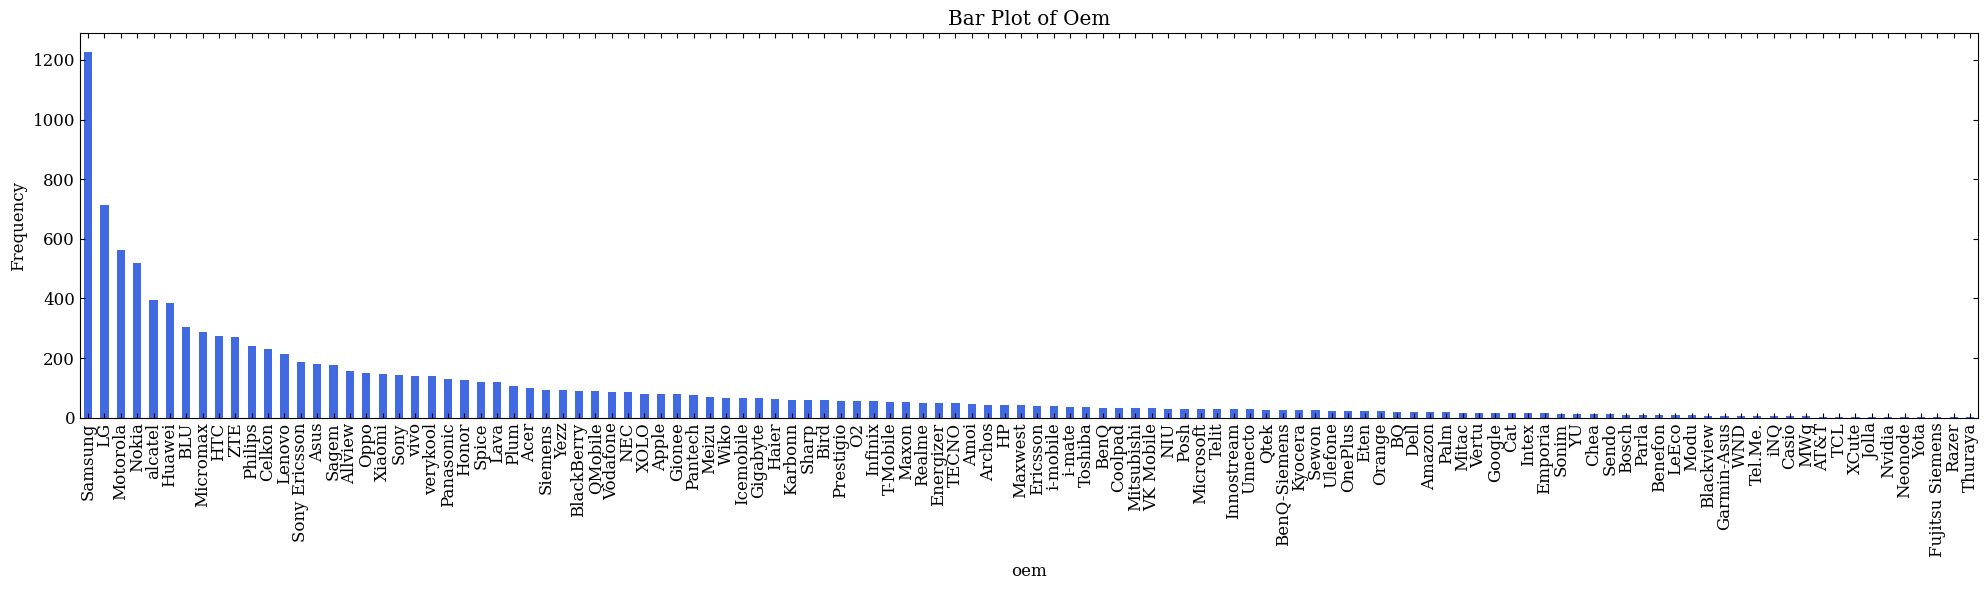

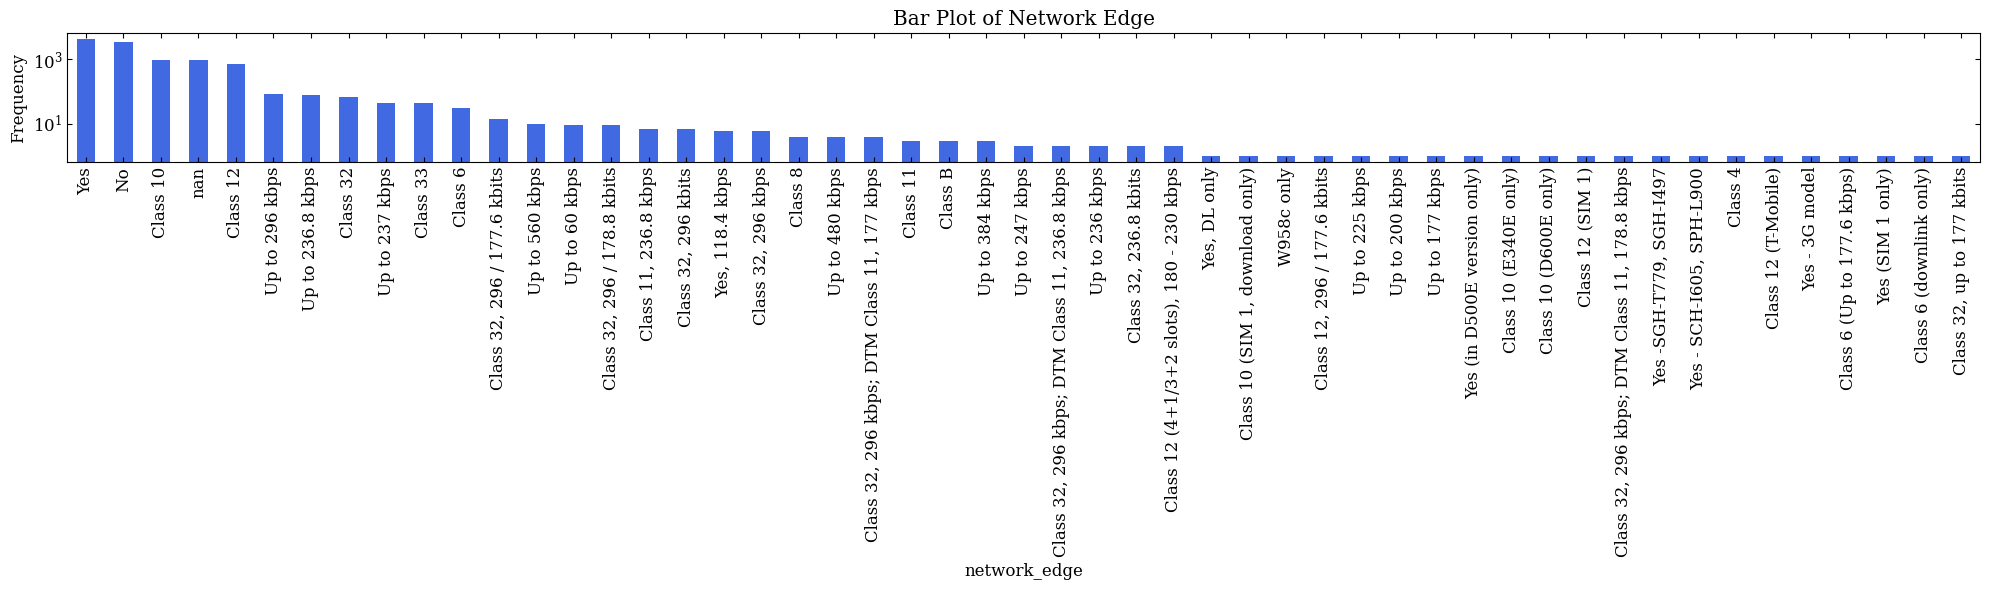

In [7]:
# Plot for oem
def plot(name, log=False):
    fig, ax = plt.subplots(figsize=(20, 6))
    df_processed[name].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'Bar Plot of {name.replace("_", " ").title()}')
    ax.set_xlabel(name)
    ax.set_ylabel('Frequency')
    if log:
        ax.set_yscale('log')
    fig.tight_layout()
    plt.show()
for variable in ["oem"]:
    plot(variable)
for variable in ["network_edge"]:
    plot(variable, log=True)

In [8]:
df_processed.loc[:, "weight"] =  df.body_weight.str.extract('(\d+\.*\d*) g').astype(float)

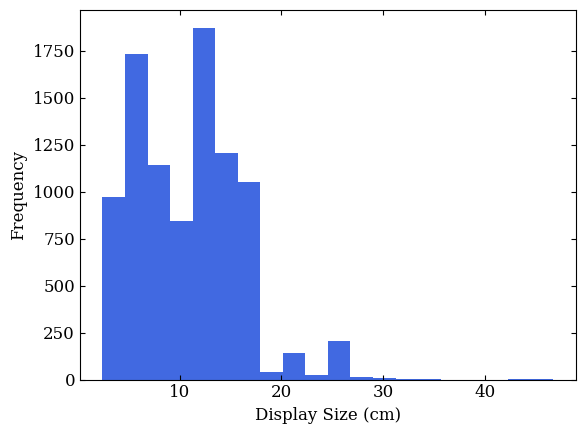

In [9]:
df_processed.loc[:, "display_size"] = df["display_size"].str.extract('(\d+\.\d+) inch', expand=False).astype(float).to_numpy() * 2.54
data = df_processed["display_size"]
plt.hist(data, bins=20)
plt.xlabel("Display Size (cm)")
plt.ylabel("Frequency")
plt.show()

In [10]:
body_dimensions = df["body_dimensions"].str.extract('(\d+\.*\d*) x (\d+\.*\d*) x (\d+\.*\d*) mm', expand=False).astype(float).to_numpy().T
for dim, data in zip(["height", "width", "depth"], body_dimensions):
    df_processed.loc[:, dim] = data

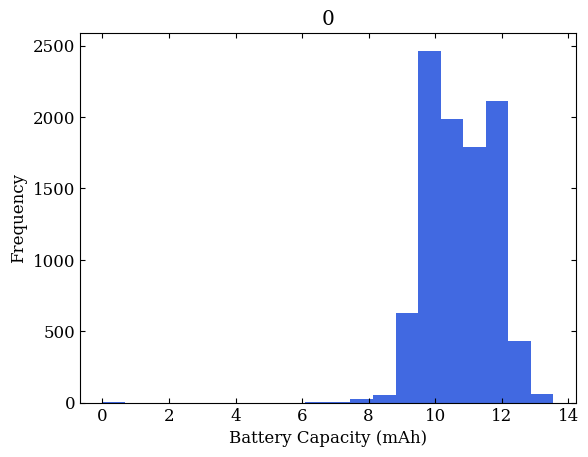

In [11]:
battery = df.battery.str.extract('(\d+\.*\d*) mAh').astype(float)
battery = (battery + 1).apply(np.log2)
battery.hist(bins=20, grid=False)
plt.xlabel("Battery Capacity (mAh)")
plt.ylabel("Frequency")
df_processed.loc[:, "battery"] = battery

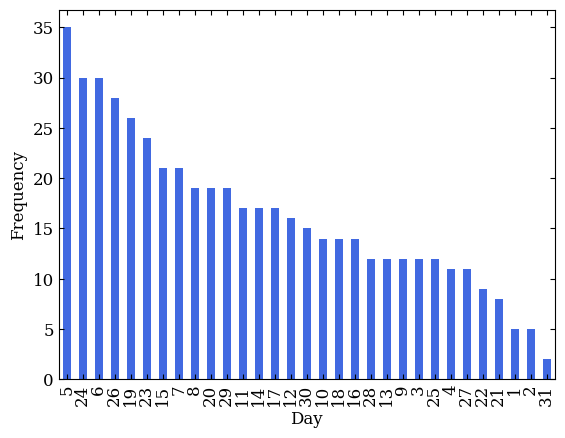

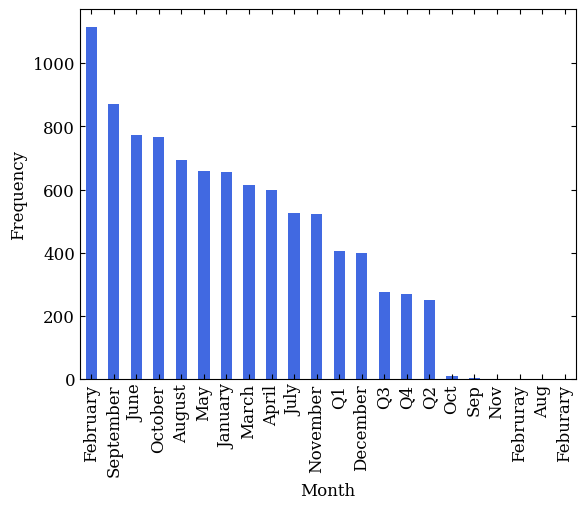

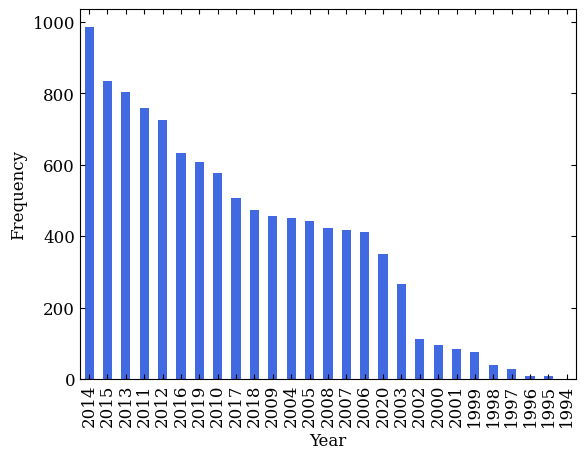

In [12]:
# extract year, month, day if possible
year = df.launch_announced.str.extract('(\d{4})', expand=False).astype(float)
month = df.launch_announced.str.extract('\d{4}\,\D([a-zA-Z]{2,}|Q\d{1})', expand=False)
day = df.launch_announced.str.extract('\d{4}\,\D[a-zA-Z]{2,}\D(\d{1,2})', expand=False).astype(float)
day.dropna().astype(int).value_counts().plot(kind='bar', xlabel='Day', ylabel='Frequency')
plt.show()
month.dropna().value_counts().plot(kind='bar', xlabel='Month', ylabel='Frequency')
plt.show()
year.dropna().astype(int).value_counts().plot(kind='bar', xlabel='Year', ylabel='Frequency')
plt.show()

In [13]:
print(df[year.isna()].launch_announced.value_counts())
year

Not officially announced yet    37
Not announced yet               37
V1                              17
Name: launch_announced, dtype: int64


0        1999.0
1        2010.0
2        2010.0
3           NaN
4        2019.0
          ...  
10674    2009.0
10675    2009.0
10676    2009.0
10677    2009.0
10678    2007.0
Name: launch_announced, Length: 10679, dtype: float64

In [14]:
df_processed.loc[:, "launch.year"] = year
df_processed.loc[:, "launch.day"] = day
df_processed.loc[:, "launch.month"] = month.replace(
    {
        "January": 1,
        "February": 2,
        "March": 3,
        "April": 4,
        "May": 5,
        "June": 6,
        "July": 7,
        "August": 8,
        "September": 9,
        "October": 10,
        "November": 11,
        "December": 12,
        "Fubruray": 2,
        "Feburary": 2,
        "Februray": 2,
        "Aug": 8,
        "Nov": 11,
        "Sep": 9,
        "Oct": 10,
        "Q1": 2,
        "Q2": 5,
        "Q3": 8,
        "Q4": 11,
    }
)

## Finalized Data
Let's take a quick look at our finalized, processed data. 
We can also plot a few observables to see if there are any obvious interesting trends.

In [15]:
df_processed

,model,oem,network_edge,weight,display_size,height,width,depth,battery,launch.year,launch.day,launch.month
0,Vega,Benefon,No,190.0,NaN,145.0,56.0,23.0,NaN,1999.0,NaN,NaN
1,nuvifone M10,Garmin-Asus,nan,NaN,8.890,NaN,NaN,NaN,10.551708,2010.0,NaN,1.0
2,GSmart G1305 Boston,Gigabyte,nan,118.0,8.128,116.0,56.8,12.4,10.265615,2010.0,NaN,4.0
3,GSmart,Gigabyte,nan,NaN,7.112,103.0,54.0,13.4,10.551708,NaN,NaN,NaN
4,Pixel 4 XL,Google,nan,193.0,16.002,160.4,75.1,8.2,11.853699,2019.0,15.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10674,F600,ZTE,Class 10,90.0,6.096,103.0,48.0,13.5,9.645658,2009.0,NaN,NaN
10675,F103,ZTE,Class 10,90.0,5.080,105.0,46.0,12.6,9.967226,2009.0,NaN,NaN
10676,F101,ZTE,Class 10,90.0,5.080,105.0,46.0,12.6,9.967226,2009.0,NaN,NaN
10677,F100,ZTE,Class 10,90.0,5.080,105.0,46.0,12.6,9.967226,2009.0,NaN,NaN


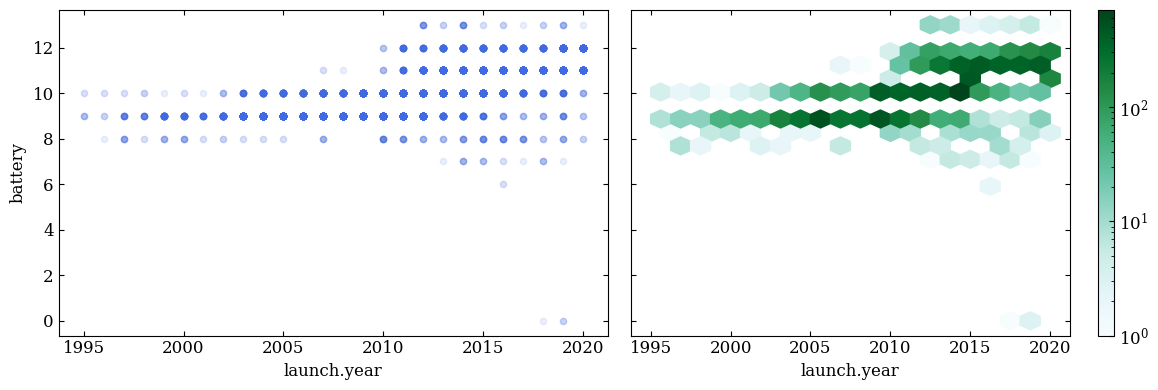

In [16]:
# make 2d hist plot
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True, sharex=True)
df_processed[["launch.year", "battery"]].dropna().astype(int).plot.scatter(x="launch.year", y="battery", alpha=0.1, ax=axes[0])
df_processed[["launch.year", "battery"]].dropna().astype(int).plot.hexbin(x="launch.year", y="battery", gridsize=20, ax=axes[1], bins='log')
fig.tight_layout()


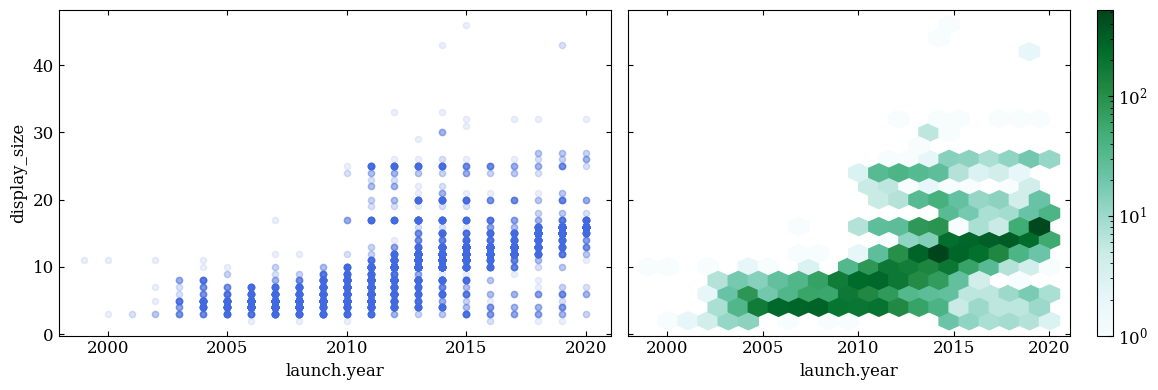

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True, sharex=True)   
df_processed[["launch.year", "display_size"]].dropna().astype(int).plot.scatter(x="launch.year", y="display_size", alpha=0.1, ax=axes[0])
df_processed[["launch.year", "display_size"]].dropna().astype(int).plot.hexbin(x="launch.year", y="display_size", gridsize=20, ax=axes[1], bins='log')
fig.tight_layout()

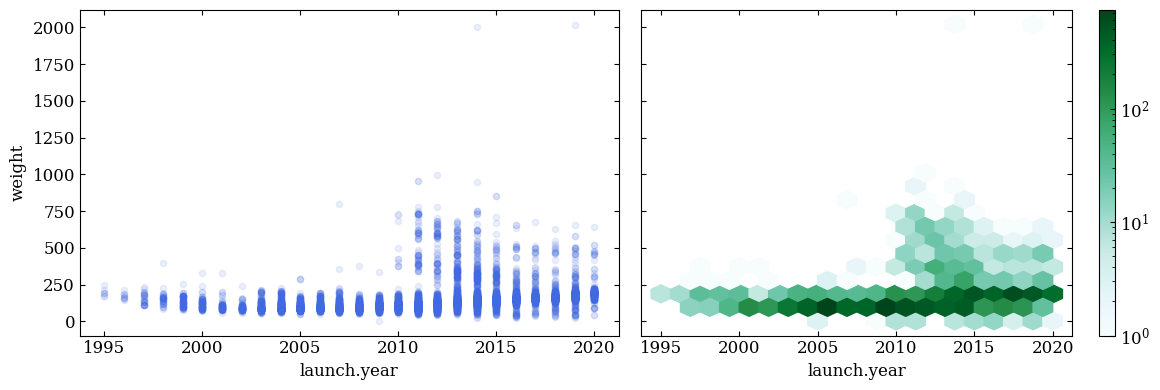

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True, sharex=True)
df_processed[["launch.year", "weight"]].dropna().astype(int).plot.scatter(x="launch.year", y="weight", alpha=0.1, ax=axes[0])
df_processed[["launch.year", "weight"]].dropna().astype(int).plot.hexbin(x="launch.year", y="weight", gridsize=20, ax=axes[1], bins='log')
fig.tight_layout()

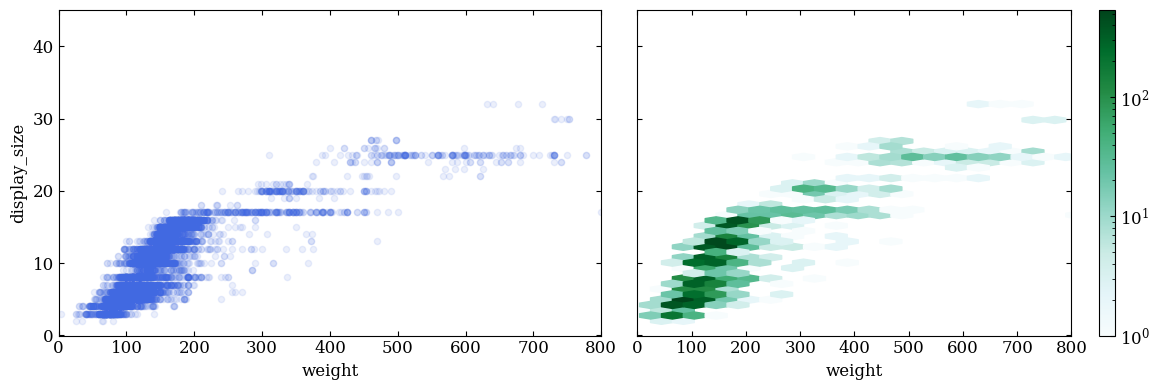

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True, sharex=True)
axes[0].set_xlim(0, 800)
df_processed[["weight", "display_size"]].dropna().astype(int).plot.scatter(x="weight", y="display_size", alpha=0.1, ax=axes[0])
df_processed[["weight", "display_size"]].dropna().astype(int).plot.hexbin(x="weight", y="display_size", gridsize=50, ax=axes[1], bins='log')
fig.tight_layout()

<Axes: xlabel='Year', ylabel='Frequency'>

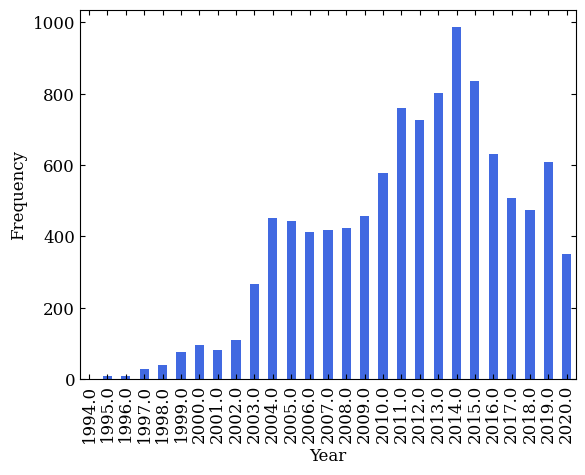

In [20]:
df_processed["launch.year"].value_counts().sort_index().plot(kind='bar', xlabel='Year', ylabel='Frequency')

<Axes: xlabel='Month', ylabel='Frequency'>

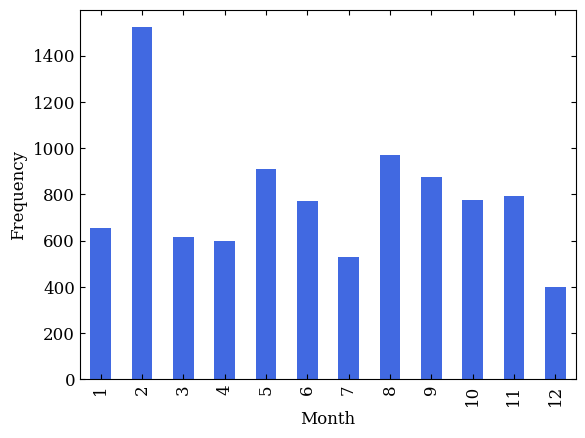

In [21]:
df_processed[df_processed["launch.month"].notna()]["launch.month"].astype(int).value_counts().sort_index().plot(kind='bar', xlabel='Month', ylabel='Frequency')

In [22]:
df_processed.describe()

,weight,display_size,height,width,depth,battery,launch.year,launch.day,launch.month
count,9626.000000,9268.000000,10287.000000,10287.000000,10287.000000,9554.000000,10588.000000,507.000000,9411.000000
mean,147.995917,10.821959,129.369272,65.739584,13.014980,10.731901,2011.634964,15.948718,6.130592
std,93.984026,5.059618,34.636882,24.429045,5.249419,0.978098,5.158068,8.376122,3.391471
min,4.000000,2.413000,23.000000,15.700000,0.000000,0.000000,1994.000000,1.000000,1.000000
25%,96.000000,6.096000,106.000000,49.000000,8.900000,9.967226,2008.000000,8.000000,3.000000
50%,130.000000,10.922000,123.000000,63.000000,11.500000,10.732167,2012.000000,16.000000,6.000000
75%,165.000000,13.970000,148.700000,73.300000,15.900000,11.551228,2015.000000,24.000000,9.000000
max,2018.300000,46.736000,451.800000,283.200000,75.000000,13.550867,2020.000000,31.000000,12.000000


In [23]:
print(df_processed.columns.to_list())

['model', 'oem', 'network_edge', 'weight', 'display_size', 'height', 'width', 'depth', 'battery', 'launch.year', 'launch.day', 'launch.month']


Let's save what we have so far to a new file. And create a schema to go with it.

In [24]:
df_processed.to_csv(os.path.join(datadir, "gsm_processed.csv"), index=False)

In [25]:
import json
# 0 for numerical, 1 for categorical, 2 for text field
schema = {
    "phone": {
        "model": 2,
        "oem": 1,
        "network_edge": 1,
        "weight":0,
        "height":0,
        "depth":0,
        "width":0,
        "display_size":0,
        "battery":0,
        "launch": {"day":0, "month":0, "year": 0},
    }
}
# save to json
json.dump(schema, open(os.path.join(datadir, "gsm_schema.json"), "w"))
json.loads(open(os.path.join(datadir, "gsm_schema.json")).read())

{'phone': {'model': 2,
  'oem': 1,
  'network_edge': 1,
  'weight': 0,
  'height': 0,
  'depth': 0,
  'width': 0,
  'display_size': 0,
  'battery': 0,
  'launch': {'day': 0, 'month': 0, 'year': 0}}}